## Fetches data from DB, loads audio
`data` is a pandas DataFrame, and `player` is an object that will play back a segment given a start and end time

In [43]:
import pandas as pd
from fetch_data import get_results_dataframe
from player import Player
import time
from scipy.stats import ttest_ind, describe
import matplotlib.pyplot as plt

data = get_results_dataframe()
player = Player()

FOREST = 0
HARSH = 1
STREET = 2

Loaded songs.


In [ ]:
def play_all():
    grouped_df = data.sort_values("Start").groupby(["Song", "Label"])
    for key, item in grouped_df:
    #     print(grouped_df.get_group(key), "\n\n")
        d = grouped_df.get_group(key)
        for _, row in d.iterrows():            
            print("Playing %s (%s): %.4f-%.4f [%s]" % (row["ID"], row["Musician Type"], row["Start"], row["End"], row["Label"]))
            try:
                player.play(row["Song"], row["Start"], row["End"])
            except KeyboardInterrupt:
                try:
                    time.sleep(0.2)
                except KeyboardInterrupt:
                    try:
                        time.sleep(0.2)
                        break
                    except KeyboardInterrupt:
                        return
                
play_all()

In [20]:
gb = data.groupby(["Musician Type"])
perc_value_counts = gb.get_group("Percussionist")["Label"].value_counts()
perc_rtm_to_mel = perc_value_counts["rhythmic"] / perc_value_counts["melodic"]

inst_value_counts = gb.get_group("Instrumentalist")["Label"].value_counts()
inst_rtm_to_mel = inst_value_counts["rhythmic"] / inst_value_counts["melodic"]

print("Percussionist Group rhythmic/melodic ratio:", perc_rtm_to_mel)
print("Instrumentalist Group rhythmic/melodic ratio:", inst_rtm_to_mel)

Percussionist Group rhythmic/melodic ratio: 1.0833333333333333
Instrumentalist Group rhythmic/melodic ratio: 1.2142857142857142


In [5]:
gb = data.groupby(["ID"])
inst_avg = 0.0
num_inst = 0

perc_avg = 0.0
num_perc = 0

inst_ratios = []
perc_ratios = []

for gtid, _ in gb:
    participant = gb.get_group(gtid)
    musician_type = participant["Musician Type"].iloc[0]
    participant_value_counts = participant["Label"].value_counts()
    participant_rtm_to_mel = participant_value_counts["rhythmic"] / participant_value_counts["melodic"]
    
    if musician_type == "Instrumentalist":
        num_inst += 1
        inst_avg += participant_rtm_to_mel
        inst_ratios.append(participant_rtm_to_mel)
        inst_avg /= num_inst
    else:
        num_perc += 1
        perc_avg += participant_rtm_to_mel
        perc_ratios.append(participant_rtm_to_mel)
        perc_avg /= num_perc
    
    print(gtid, "(" + musician_type + "):", participant_rtm_to_mel)
    
print("Percussionist individual average rhythmic/melodic ratio:", perc_avg)
print("Instrumentalist individual average rhythmic/melodic ratio:", inst_avg)

902946528 (Percussionist): 0.4
903083687 (Instrumentalist): 2.6
903086455 (Instrumentalist): 0.8181818181818182
903165064 (Percussionist): 0.6923076923076923
903232755 (Instrumentalist): 1.40625
903307328 (Instrumentalist): 0.4444444444444444
903307335 (Instrumentalist): 1.0952380952380953
903337531 (Percussionist): 1.5
903339276 (Instrumentalist): 1.1428571428571428
903339825 (Percussionist): 1.625
903352025 (Instrumentalist): 1.1111111111111112
903391589 (Instrumentalist): 1.3157894736842106
903396080 (Instrumentalist): 1.5
903417226 (Instrumentalist): 1.375
903423561 (Instrumentalist): 0.875
903428888 (Instrumentalist): 0.6666666666666666
903446600 (Instrumentalist): 1.4285714285714286
903447018 (Instrumentalist): 1.1428571428571428
903447693 (Instrumentalist): 1.1428571428571428
903447762 (Instrumentalist): 5.0
Percussionist individual average rhythmic/melodic ratio: 0.5767628205128205
Instrumentalist individual average rhythmic/melodic ratio: 0.3176361969421458


In [ ]:
grouped_df = data.sort_values("Start").groupby(["Song", "Label"])
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

In [ ]:
player.play(HARSH, 0.0, 7.0)

In [7]:
print(perc_ratios)
print(inst_ratios)

[0.4, 0.6923076923076923, 1.5, 1.625]
[2.6, 0.8181818181818182, 1.40625, 0.4444444444444444, 1.0952380952380953, 1.1428571428571428, 1.1111111111111112, 1.3157894736842106, 1.5, 1.375, 0.875, 0.6666666666666666, 1.4285714285714286, 1.1428571428571428, 1.1428571428571428, 5.0]


In [52]:
inst_desc = describe(inst_ratios)
perc_desc = describe(perc_ratios)
print("Instrumentalist mean, var: %f, %f" % (inst_desc.mean, inst_desc.variance))
print("Percussionist mean, var: %f, %f" % (perc_desc.mean, perc_desc.variance))

t, p = ttest_ind(inst_ratios, perc_ratios, equal_var=False)
print("t:", t, "p:", p)

Instrumentalist mean, var: 1.441552, 1.122044
Percussionist mean, var: 1.054327, 0.361165
t: 0.9667968099440425 p: 0.36049763263016477


Text(0.5, 1.0, 'Ratio of Rhythmic/Melodic Identified Musical Patterns')

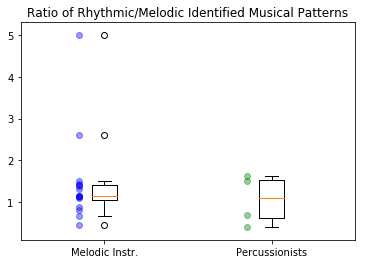

In [48]:
plt.boxplot([inst_ratios, perc_ratios], labels=["Melodic Instr.", "Percussionists"])
plt.scatter([0.85 for _ in range(len(inst_ratios))], inst_ratios, c="blue", alpha=0.4)
plt.scatter([1.85 for _ in range(len(perc_ratios))], perc_ratios, c="green", alpha=0.4)

plt.title("Ratio of Rhythmic/Melodic Identified Musical Patterns")

In [49]:
no_outliers_inst_ratios = list(filter(lambda x: x < 2, inst_ratios))
print(len(inst_ratios), len(no_outliers_inst_ratios))

16 14


In [51]:
no_outliers_inst_desc = describe(no_outliers_inst_ratios)
perc_desc = describe(perc_ratios)
print("Instrumentalist (w/o outliers) mean, var: %f, %f" % (no_outliers_inst_desc.mean, no_outliers_inst_desc.variance))
print("Percussionist mean, var: %f, %f" % (perc_desc.mean, perc_desc.variance))

no_outliers_t, no_outliers_p = ttest_ind(no_outliers_inst_ratios, perc_ratios)
print("t:", no_outliers_t, "p:", no_outliers_p)

Instrumentalist (w/o outliers) mean, var: 1.104630, 0.095144
Percussionist mean, var: 1.054327, 0.361165
t: 0.23298975897961388 p: 0.8187237706597266


Text(0.5, 1.0, 'Ratio of Rhythmic/Melodic Identified Musical Patterns (minus outliers)')

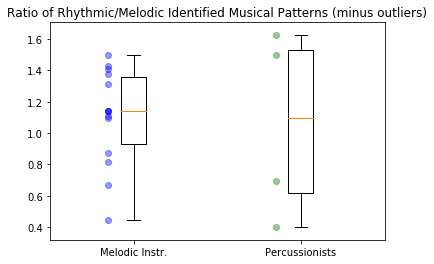

In [50]:
plt.boxplot([no_outliers_inst_ratios, perc_ratios], labels=["Melodic Instr.", "Percussionists"])
plt.scatter([0.85 for _ in range(len(no_outliers_inst_ratios))], no_outliers_inst_ratios, c="blue", alpha=0.4)
plt.scatter([1.85 for _ in range(len(perc_ratios))], perc_ratios, c="green", alpha=0.4)

plt.title("Ratio of Rhythmic/Melodic Identified Musical Patterns (minus outliers)")

In [53]:
data["Region Length"] = data.apply(lambda row: (row['End'] - row['Start']), axis=1)

In [59]:
data['Region Length'].max()

60.07261364231677